# Visualize some daccs

In [7]:
from i2.footprints import attribute_dependencies, init_argument_names
from meshed.itools import graphviz_digraph
from meshed import Pipe

visualize_attr_deps = Pipe(attribute_dependencies, dict, graphviz_digraph)

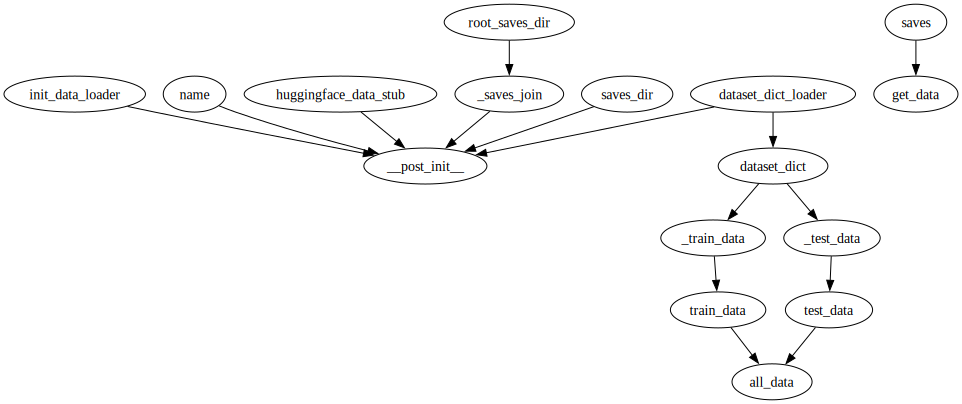

In [9]:
from imbed.base import HugfaceDaccBase

visualize_attr_deps(HugfaceDaccBase)

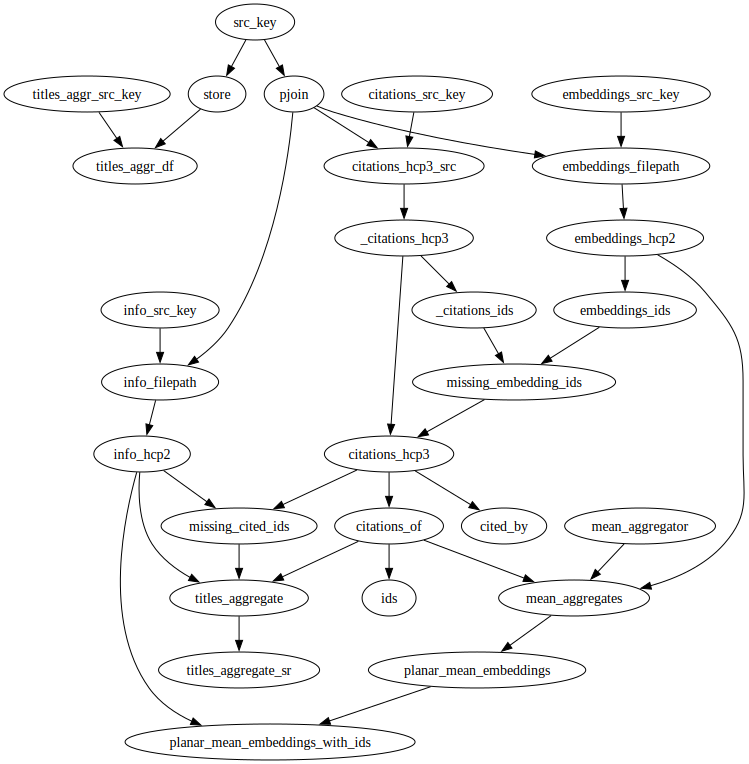

In [7]:
from imbed_data_prep.hcp import Hcp3Dacc

visualize_attr_deps(Hcp3Dacc)

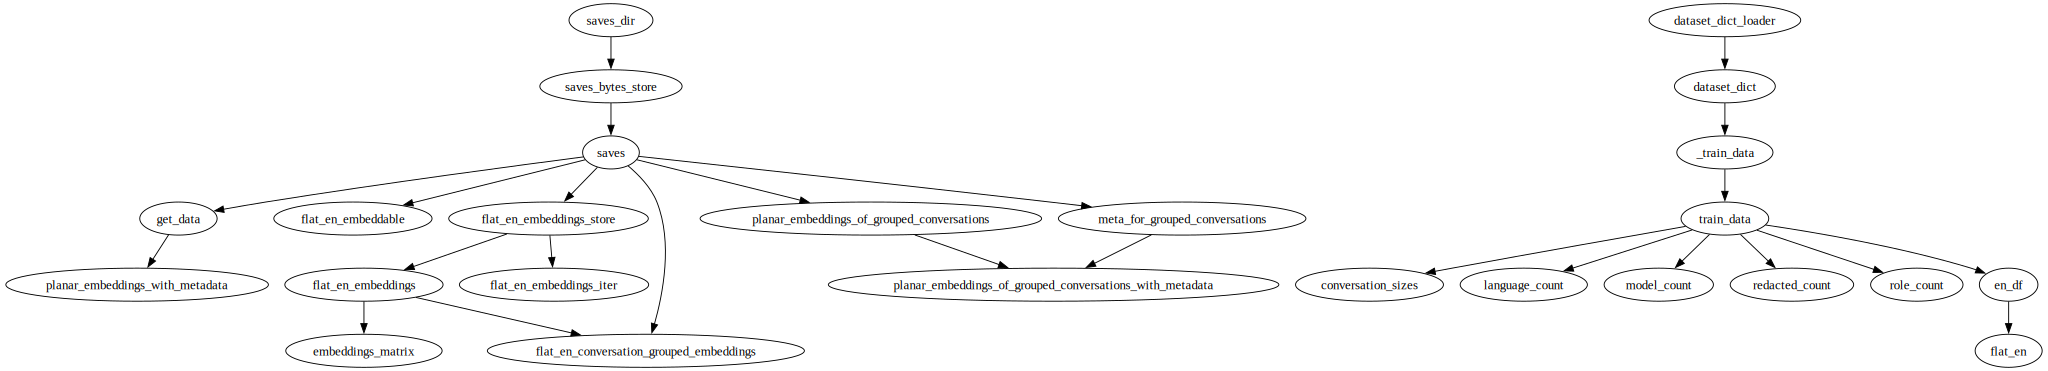

In [8]:
from imbed_data_prep.lmsys_ai_conversations import Dacc as LmsysDacc

visualize_attr_deps(LmsysDacc)

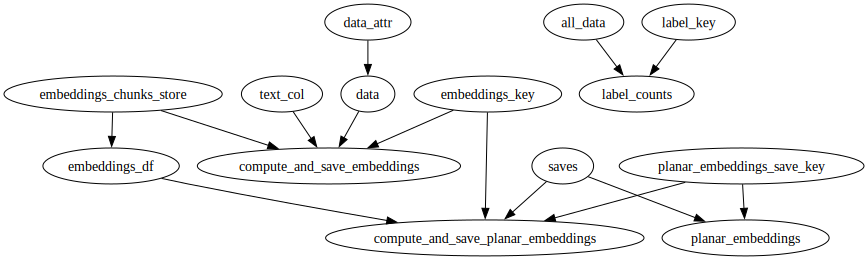

In [9]:
from imbed_data_prep.prompt_injections import Dacc as PiDacc

visualize_attr_deps(PiDacc)

In [12]:
# from hubcap import repo_text_aggregate
# from pathlib import Path


# s = repo_text_aggregate(
#     'https://github.com/cosmograph-org/cosmos', kinds=['discussions']
# )
# Path('/Users/thorwhalen/Downloads/cosmograph_github_discussions.md').write_text(s)

# WildChat-1M

In [19]:
from imbed.base import HugfaceDaccBase

rootdir = '/Users/thorwhalen/Dropbox/_odata/figiri/'
huggingface_data_stub = 'allenai/WildChat-1M'

hf = HugfaceDaccBase(huggingface_data_stub, root_saves_dir=rootdir)



In [20]:
df = hf.train_data

In [21]:
df.shape

(840774, 14)

In [16]:
from haggle import get_kaggle_dataset

kaggle_data_stub = 'kazanova/sentiment140'
data = get_kaggle_dataset(kaggle_data_stub)

In [18]:
list(data)

['training.1600000.processed.noemoticon.csv']

# Eurovis

In [1]:
from imbed_data_prep.eurovis import EurovisDacc

dacc = EurovisDacc()

In [7]:
# from imbed import fixed_step_chunker

# for i, chunk in enumerate(
#     fixed_step_chunker(segments.items(), chk_size=200, return_tail=True)
# ):
#     chunk = dict(chunk)
#     dacc.saves[f"embeddings_chunks/embeddings_{i:03d}.pickle"] = chunk


In [11]:
from imbed import fixed_step_chunker
from lkj import print_progress, clog as _clog
from functools import partial 

clog = partial(_clog, log_func=print_progress)


def length_if_sizable(segments):
    if hasattr(segments, '__len__'):
        return len(segments)
    else:
        return None
    

def create_embedding_task_batches(segments, batch_size, *, oa_stores=None, verbose=True):
    log = clog(verbose)
    if oa_stores is None:
        from oa import OaStores
        oa_stores = OaStores()

    total_length = length_if_sizable(segments)
    if total_length is not None:
        total_n_batches = int(total_length / batch_size) + 1
    else:
        total_n_batches = '<size unknown>'

    try:
        for i, batch in enumerate(fixed_step_chunker(segments, batch_size)):
            log(f"Uploading batch {i+1} of {total_n_batches}")
            file_id = oa_stores.files.create_embedding_task(batch)
            log(f"  Launching batch for {file_id=}")
            batch_id = oa_stores.batches.append(file_id)
            log(f"  {batch_id.id=}, {batch_id.created_at=}")
            yield batch_id
    except Exception as e:
        print(f"Error: {e}")


In [13]:
it = create_embedding_task_batches(segments, batch_size=500)  # Adjust batch size as needed
batch_ids = list(it)
dacc.saves['oa_embeddings_batch_ids.pkl'] = batch_ids

(18)15:44:49 - Uploading batch 1 of 12
(18)15:44:50 -   Launching batch for file_id=FileObject(id='file-mRRCC2cUExUqNItyfeLtWQvt', bytes=13589, created_at=1726667090, filename='upload', object='file', purpose='batch', status='processed', status_details=None)
(18)15:44:51 -   batch_id.id='batch_XwB7z3dGMtIAfQ3t87AGQStR', batch_id.created_at=1726667091
(18)15:44:51 - Uploading batch 2 of 12
(18)15:44:52 -   Launching batch for file_id=FileObject(id='file-xgOqx3NEYvxOOsGnVlPkJ9lZ', bytes=13491, created_at=1726667091, filename='upload', object='file', purpose='batch', status='processed', status_details=None)
(18)15:44:53 -   batch_id.id='batch_iMUBukNr1Na4GJDC399ouExU', batch_id.created_at=1726667092
(18)15:44:53 - Uploading batch 3 of 12
(18)15:44:53 -   Launching batch for file_id=FileObject(id='file-sAowUxTVyELEu8R2hqTS37or', bytes=13414, created_at=1726667093, filename='upload', object='file', purpose='batch', status='processed', status_details=None)
(18)15:44:54 -   batch_id.id='batch

In [16]:
from oa import OaStores

s = OaStores()
s   

In [17]:
batch_infos = list(map(s.batches_base.get, batch_ids))

In [19]:
import pandas as pd

pd.DataFrame([x.to_dict() for x in batch_infos])

,id,completion_window,created_at,endpoint,input_file_id,object,status,cancelled_at,cancelling_at,completed_at,error_file_id,errors,expired_at,expires_at,failed_at,finalizing_at,in_progress_at,metadata,output_file_id,request_counts
0,batch_XwB7z3dGMtIAfQ3t87AGQStR,24h,1726667091,/v1/embeddings,file-mRRCC2cUExUqNItyfeLtWQvt,batch,completed,None,None,1726667189,None,None,None,1726753491,None,1726667188,1726667091,None,file-OzOg569ChNGBI1JbW9VZVcV0,"{'completed': 1, 'failed': 0, 'total': 1}"
1,batch_iMUBukNr1Na4GJDC399ouExU,24h,1726667092,/v1/embeddings,file-xgOqx3NEYvxOOsGnVlPkJ9lZ,batch,completed,None,None,1726667189,None,None,None,1726753492,None,1726667188,1726667093,None,file-pE0IfotXlNqJxoionPrVy0uY,"{'completed': 1, 'failed': 0, 'total': 1}"
2,batch_tMu7ViQTPafySktnyXmMmiIH,24h,1726667094,/v1/embeddings,file-sAowUxTVyELEu8R2hqTS37or,batch,completed,None,None,1726667189,None,None,None,1726753494,None,1726667188,1726667094,None,file-JPuZ4dB88wHnwalIT0BVue5z,"{'completed': 1, 'failed': 0, 'total': 1}"
3,batch_JsiyZSQeNVGn5gUEdTajIicL,24h,1726667095,/v1/embeddings,file-lfriGjoCD7DviGr6HNjedezs,batch,completed,None,None,1726667189,None,None,None,1726753495,None,1726667188,1726667095,None,file-SaIkOppSNhs23T4bLFXdXOpR,"{'completed': 1, 'failed': 0, 'total': 1}"
4,batch_fj4pwFOwjoupVm171NSNmuXz,24h,1726667096,/v1/embeddings,file-egIJEzH2lU50NwiOChWlkqN4,batch,completed,None,None,1726667189,None,None,None,1726753496,None,1726667188,1726667096,None,file-yyMAxxeZHp24ktuMKNrQE987,"{'completed': 1, 'failed': 0, 'total': 1}"
5,batch_4cGNI0UfZ1GRKq0rtAXnPFNF,24h,1726667098,/v1/embeddings,file-cSzzM1djFIpsxb6WxZTNDL5x,batch,completed,None,None,1726667189,None,None,None,1726753498,None,1726667188,1726667098,None,file-6dbKWS4zka6T0LM6lPVSIbm1,"{'completed': 1, 'failed': 0, 'total': 1}"
6,batch_SWoM8DZLlFECcLFyYEmicCAL,24h,1726667099,/v1/embeddings,file-TnkT2wjvqIhaviOSyb7f6iwk,batch,completed,None,None,1726667189,None,None,None,1726753499,None,1726667188,1726667099,None,file-GOl8s0RQkLBK8wG1pGw1jCR0,"{'completed': 1, 'failed': 0, 'total': 1}"
7,batch_Fk6FSvAIyGnvWjEnjmCa3NGI,24h,1726667100,/v1/embeddings,file-I8c72UNyeugNSPW7YaYBnqaa,batch,completed,None,None,1726667190,None,None,None,1726753500,None,1726667188,1726667100,None,file-xnXscOmH2rziUVQiNUWFkioC,"{'completed': 1, 'failed': 0, 'total': 1}"
8,batch_KvKMV5hUee09JTIYxD7X6E6E,24h,1726667101,/v1/embeddings,file-EznAjvoj3s3uq8xGuD8DTVwE,batch,completed,None,None,1726667190,None,None,None,1726753501,None,1726667189,1726667101,None,file-2sWXChW5WLvJToKtxYp8dFFV,"{'completed': 1, 'failed': 0, 'total': 1}"
9,batch_4zvlQmuGFBJBo8BFeBDCwvpE,24h,1726667102,/v1/embeddings,file-frW7zxJQ3KGSrBFAFadbHIJx,batch,completed,None,None,1726667190,None,None,None,1726753502,None,1726667189,1726667102,None,file-Uo6uau5EFy8LnxCrQIt9RzJU,"{'completed': 1, 'failed': 0, 'total': 1}"


In [25]:
from lkj import print_with_timestamp
import pandas as pd 
from oa.batches import batch_info_to_segments_and_embeddings

for i, batch_info in enumerate(batch_infos):
    if batch_info.output_file_id is not None:
        print_with_timestamp(f"{i=}, {batch_info=}")
        if batch_info.endpoint == '/v1/embeddings' and batch_info.status == 'completed':
            segments, embeddings = batch_info_to_segments_and_embeddings(s.jsonl_files, batch_info)
            df = pd.DataFrame(dict(zip(['segment', 'embedding'], [segments, embeddings])))
            dacc.saves[f'embeddings/embeddings_{i:03d}.parquet'] = df


(18)15:55:06 - i=0, batch_info=Batch(id='batch_XwB7z3dGMtIAfQ3t87AGQStR', completion_window='24h', created_at=1726667091, endpoint='/v1/embeddings', input_file_id='file-mRRCC2cUExUqNItyfeLtWQvt', object='batch', status='completed', cancelled_at=None, cancelling_at=None, completed_at=1726667189, error_file_id=None, errors=None, expired_at=None, expires_at=1726753491, failed_at=None, finalizing_at=1726667188, in_progress_at=1726667091, metadata=None, output_file_id='file-OzOg569ChNGBI1JbW9VZVcV0', request_counts=BatchRequestCounts(completed=1, failed=0, total=1))
(18)15:55:09 - i=1, batch_info=Batch(id='batch_iMUBukNr1Na4GJDC399ouExU', completion_window='24h', created_at=1726667092, endpoint='/v1/embeddings', input_file_id='file-xgOqx3NEYvxOOsGnVlPkJ9lZ', object='batch', status='completed', cancelled_at=None, cancelling_at=None, completed_at=1726667189, error_file_id=None, errors=None, expired_at=None, expires_at=1726753492, failed_at=None, finalizing_at=1726667188, in_progress_at=172666

In [26]:
dacc.saves_dir

'/Users/thorwhalen/Dropbox/_odata/app_data/imbed/saves/eurovis'

In [27]:
# TODO: Make a tool for saving chunks to a folder, then aggregating, then saving the aggregated file and deleting the chunks.
# Concatenate all the parquet files into one dataframe.

from tabled import DfFiles, ColumnOrientedMapping
from dol import filt_iter, cached_keys, Pipe
from functools import partial
import re

mk_df_files_aggregate = Pipe(
    DfFiles,
    filt_iter.suffixes('.parquet'),
    cached_keys(keys_cache=partial(sorted, key=lambda k: int(re.compile(r'(\d+)').search(k).group(1)))), 
)

df_files = mk_df_files_aggregate('/Users/thorwhalen/Dropbox/_odata/app_data/imbed/saves/eurovis/embeddings')
embeddings_df = ColumnOrientedMapping(df_files).df()  # 22s
print(embeddings_df.shape)
embeddings_df.head()
len(df_files)

(5500, 2)


11

In [41]:
embeddings_df = embeddings_df.rename(columns={'segment': 'id_'})
embeddings_df = embeddings_df.set_index('id_')
embeddings_df

,embedding
id_,
10.1111/cgf.15097,"[0.037797708, 0.036866464, 0.052232053, 0.0591..."
10.1111/cgf.15111,"[0.039235357, 0.03717034, 0.054443944, 0.05455..."
10.1111/cgf.15077,"[0.040482648, 0.040123418, 0.050624035, 0.0600..."
10.1111/cgf.15088,"[0.03968059, 0.036471542, 0.050647166, 0.05820..."
10.1111/cgf.15099,"[0.041764546, 0.03194582, 0.050604198, 0.05566..."
...,...
10.1109/VISUAL.1991.175826,"[-0.0029280195, 0.046376687, 0.027354384, -0.0..."
10.1109/VISUAL.1991.175814,"[-0.011529215, 0.04624184, 0.023355253, -0.013..."
10.1109/VISUAL.1991.175801,"[-0.01639382, 0.044230305, 0.024630023, -0.009..."


In [42]:
dacc.saves['embeddings_df.parquet']  = embeddings_df

In [43]:
import imbed

planar_embeddings_ = imbed.planar_embeddings(
    embeddings_df.embedding, embeddings_func='ncvis'
)

In [45]:
dacc.saves['planar_embeddings.parquet'] = imbed.util.planar_embeddings_dict_to_df(
    planar_embeddings_
)

## Join raw data with embeddings and clusters

In [ ]:
t = dacc.saves['raw_data.parquet']
tt = dacc.saves['planar_embeddings.parquet']